[View in Colaboratory](https://colab.research.google.com/github/nishi1612/SC374-Computational-and-Numerical-Methods/blob/master/Set_9_10_11.ipynb)

Set 9
---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Solve linear systedm of equations**

In [48]:
a = np.array([[1,2,1],[2,2,3],[-1,-3,0]])
b = np.array([0,3,2])
np.linalg.solve(a,b)

array([ 1., -1.,  1.])

In [49]:
a = np.array([[4,3,2,1],[3,4,3,2],[2,3,4,3],[1,2,3,4]])
b = np.array([1,1,-1,-1])
np.linalg.solve(a,b)

array([ 1.11022302e-16,  1.00000000e+00, -1.00000000e+00,  0.00000000e+00])

**Find inverse of a given matrix**

In [50]:
a = np.array([[1,1,-1],[1,2,-2],[-2,1,1]])
np.linalg.inv(a)

array([[ 2.00000000e+00, -1.00000000e+00, -1.94289029e-16],
       [ 1.50000000e+00, -5.00000000e-01,  5.00000000e-01],
       [ 2.50000000e+00, -1.50000000e+00,  5.00000000e-01]])

Set 10
---



**Solving linear equations by Jacobi and Gauss Seidel method and comparing which one gets to the answer earliest.**

In [0]:
def jacobi(a,b,ans,initial):
  x1 = initial[0]
  x2 = initial[1]
  x3 = initial[2]
  i = 0
  x = np.array([x1,x2,x3]).reshape((3,1))
  table = pd.DataFrame(columns=['Iteration','x1','x2','x3','Error'])
  ans = ans.reshape((3,1))
  err = abs(ans[0] - x[0]) + abs(ans[1] - x[1]) + abs(ans[2] - x[2])
  table.loc[i] = [i+1,round(x1,4),round(x2,4),round(x3,4),round(err[0],4)]
  while(True):
    X1 = (b[0] - a[0][1]*x2 - a[0][2]*x3)/a[0][0]
    X2 = (b[1] - a[1][0]*x1 - a[1][2]*x3)/a[1][1]
    X3 = (b[2] - a[2][1]*x2 - a[2][0]*x1)/a[2][2]
    x1 = X1
    x2 = X2
    x3 = X3
    x = np.array([x1,x2,x3]).reshape((3,1))
    b1 = b.reshape((3,1))
    t = np.matmul(a,x) - b1 
    err = abs(ans[0] - x[0]) + abs(ans[1] - x[1]) + abs(ans[2] - x[2])
    i = i+1
    table.loc[i] = [i+1,round(x1,4),round(x2,4),round(x3,4),round(err[0],4)]
    
    if(abs(t[0]) < 0.0001 and abs(t[1]) < 0.0001 and abs(t[2]) < 0.0001):
      break
  return table, round(x1,3) , round(x2,3) , round(x3,3)

def gauss_seidel(a,b,ans,initial):
  x1 = initial[0]
  x2 = initial[1]
  x3 = initial[2]
  i = 0
  x = np.array([x1,x2,x3]).reshape((3,1))
  table = pd.DataFrame(columns=['Iteration','x1','x2','x3','Error'])
  ans = ans.reshape((3,1))
  err = abs(ans[0] - x[0]) + abs(ans[1] - x[1]) + abs(ans[2] - x[2])
  table.loc[i] = [i+1,round(x1,4),round(x2,4),round(x3,4),round(err[0],4)]
  while(True):
    X1 = (b[0] - a[0][1]*x2 - a[0][2]*x3)/a[0][0]
    x1 = X1
    X2 = (b[1] - a[1][0]*x1 - a[1][2]*x3)/a[1][1]
    x2 = X2
    X3 = (b[2] - a[2][1]*x2 - a[2][0]*x1)/a[2][2]
    x3 = X3
    x = np.array([x1,x2,x3]).reshape((3,1))
    b1 = b.reshape((3,1))
    t = np.matmul(a,x) - b1 
    err = abs(ans[0] - x[0]) + abs(ans[1] - x[1]) + abs(ans[2] - x[2])
    i = i+1
    table.loc[i] = [i+1,round(x1,4),round(x2,4),round(x3,4),round(err[0],4)]
    
    if(abs(t[0]) < 0.0001 and abs(t[1]) < 0.0001 and abs(t[2]) < 0.0001):
      break
  return table, round(x1,3) , round(x2,3) , round(x3,3)

a = np.array([[9,1,1],[2,10,3],[3,4,11]])
b = np.array([10,19,0])

x = np.linalg.solve(a,b)
initial = [0,0,0]

In [52]:
table1 , x1 , x2 ,x3 = jacobi(a,b,x,initial) 
print(x1,x2,x3)
table1

1.0 2.0 -1.0


,Iteration,x1,x2,x3,Error
0,1.0,0.0000,0.0000,0.0000,4.0000
1,2.0,1.1111,1.9000,0.0000,1.2111
2,3.0,0.9000,1.6778,-0.9939,0.4283
3,4.0,1.0351,2.0182,-0.8556,0.1978
4,5.0,0.9819,1.9496,-1.0162,0.0846
5,6.0,1.0074,2.0085,-0.9768,0.0391
6,7.0,0.9965,1.9915,-1.0051,0.0171
7,8.0,1.0015,2.0022,-0.9960,0.0078
8,9.0,0.9993,1.9985,-1.0012,0.0034
9,10.0,1.0003,2.0005,-0.9993,0.0015


In [54]:
table2 , x1, x2, x3 = gauss_seidel(a,b,x,initial)
print(x1 , x2 , x3)
table2

1.0 2.0 -1.0


,Iteration,x1,x2,x3,Error
0,1.0,0.0000,0.0000,0.0000,4.0000
1,2.0,1.1111,1.6778,-0.9131,0.5202
2,3.0,1.0262,1.9687,-0.9958,0.0617
3,4.0,1.0030,1.9981,-1.0001,0.0050
4,5.0,1.0002,2.0000,-1.0001,0.0003
5,6.0,1.0000,2.0000,-1.0000,0.0000
6,7.0,1.0000,2.0000,-1.0000,0.0000


In [55]:
initial = [100,200,100]
table1 , x1 , x2 ,x3 = jacobi(a,b,x,initial) 
print(x1,x2,x3)
table1

1.0 2.0 -1.0


,Iteration,x1,x2,x3,Error
0,1.0,100.0000,200.0000,100.0000,398.0000
1,2.0,-32.2222,-48.1000,-100.0000,182.3222
2,3.0,17.5667,38.3444,26.2788,80.1899
3,4.0,-6.0692,-9.4970,-18.7343,36.3006
4,5.0,4.2479,8.7342,5.1087,16.0908
5,6.0,-0.4270,-0.4822,-4.3346,7.2438
6,7.0,1.6463,3.2858,0.2918,3.2239
7,8.0,0.7136,1.4832,-1.6438,1.4470
8,9.0,1.1290,2.2504,-0.7340,0.6454
9,10.0,0.9426,1.8944,-1.1262,0.2892


In [56]:
table2 , x1, x2, x3 = gauss_seidel(a,b,x,initial)
print(x1 , x2 , x3)
table2

1.0 2.0 -1.0


,Iteration,x1,x2,x3,Error
0,1.0,100.0000,200.0000,100.0000,398.0000
1,2.0,-32.2222,-21.6556,16.6626,74.5404
2,3.0,1.6659,-3.4320,0.7937,7.8915
3,4.0,1.4043,1.3811,-0.8852,1.1380
4,5.0,1.0560,1.9544,-0.9987,0.1030
5,6.0,1.0049,1.9986,-1.0008,0.0071
6,7.0,1.0002,2.0002,-1.0001,0.0006
7,8.0,1.0000,2.0000,-1.0000,0.0001
8,9.0,1.0000,2.0000,-1.0000,0.0000


In [57]:
initial = [-100,-200,-100]
table1 , x1 , x2 ,x3 = jacobi(a,b,x,initial) 
print(x1,x2,x3)
table1

1.0 2.0 -1.0


,Iteration,x1,x2,x3,Error
0,1.0,-100.0000,-200.0000,-100.0000,402.0000
1,2.0,34.4444,51.9000,100.0000,184.3444
2,3.0,-15.7667,-34.9889,-28.2667,81.0222
3,4.0,8.1395,13.5333,17.0232,36.6961
4,5.0,-2.2841,-4.8349,-7.1411,16.2600
5,6.0,2.4418,4.4991,2.3811,7.3220
6,7.0,0.3466,0.6973,-2.3020,3.2580
7,8.0,1.2894,2.5213,-0.3481,1.4626
8,9.0,0.8696,1.7466,-1.2685,0.6523
9,10.0,1.0580,2.1066,-0.8723,0.2923


In [58]:
table2 , x1, x2, x3 = gauss_seidel(a,b,x,initial)
print(x1 , x2 , x3)
print(x1,x2,x3)
table2

1.0 2.0 -1.0
1.0 2.0 -1.0


,Iteration,x1,x2,x3,Error
0,1.0,-100.0000,-200.0000,-100.0000,402.0000
1,2.0,34.4444,25.0111,-18.4889,73.9444
2,3.0,0.3864,7.3694,-2.7852,7.7681
3,4.0,0.6018,2.6152,-1.1151,1.1285
4,5.0,0.9444,2.0456,-1.0014,0.1027
5,6.0,0.9951,2.0014,-0.9992,0.0072
6,7.0,0.9998,1.9998,-0.9999,0.0006
7,8.0,1.0000,2.0000,-1.0000,0.0001
8,9.0,1.0000,2.0000,-1.0000,0.0000


Set 11
---



**Solving nonlinear systems using Newton method and general iteration method**

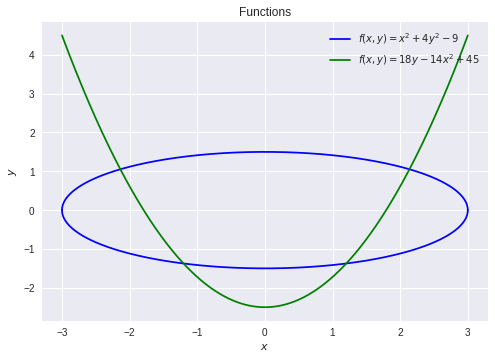

In [44]:
x = np.linspace(-3,3,10000)
y = np.sqrt((9 - x**2) / 4)
plt.plot(x,y,color='blue',label='$f(x,y) = x^2 + 4y^2 - 9$')
y = -1* np.sqrt((9 - x**2) / 4)
plt.plot(x,y,color='blue')
y = (14*(x**2) - 45) / 18
plt.plot(x,y ,color = 'green' , label = '$f(x,y) = 18y - 14x^2 + 45$')
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Functions')
plt.show()

def der_fx(x):
  return 2*x

def der_fy(x):
  return 8*x

def der_gx(x):
  return -28*x

def der_gy(x):
  return 18

def f(x,y):
  return x**2 + 4*y**2 - 9

def g(x,y):
  return 18*y - 14*x**2 + 45

def find_roots(prev_x,prev_y):
  table = pd.DataFrame(columns=['x','y'])
  i = 0
  table.loc[i] = [round(prev_x,5) , round(prev_y,5)]
  i = i + 1
  for j in range(5):
    a = np.array([[ der_fx(prev_x) , der_fy(prev_y)] , [ der_gx(prev_x) , der_gy(prev_y) ]])
    b = np.array([-1*f(prev_x,prev_y) , -1*g(prev_x,prev_y)])
    x = np.linalg.solve(a,b)
    prev_x = prev_x + x[0]
    prev_y = prev_y + x[1]
    table.loc[i] = [round(prev_x,5) , round(prev_y,5)]
    i = i + 1
  return table,prev_x,prev_y

As we can observe from the graph that at four places both the functions intersect hence four roots can be obtained such that f(x,y) = g(x,y) = 0.

---
Hence applying the general iteration formula for finding these four roots we get the results as obtained below.

In [45]:
prev_x = 2
prev_y = 1

print(prev_x, prev_y , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table , prev_x,prev_y = find_roots(prev_x,prev_y)
print(round(prev_x,5), round(prev_y,5) , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table

2 1 -1 7
2.13722 1.05265 0.0 0.0


,x,y
0,2,1
1,2.14231,1.05385
2,2.13722,1.05265
3,2.13722,1.05265
4,2.13722,1.05265
5,2.13722,1.05265


In [40]:
prev_x = -2
prev_y = 1

print(prev_x, prev_y , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table , prev_x,prev_y = find_roots(prev_x,prev_y)
print(round(prev_x,5), round(prev_y,5) , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table

-2 1 -1 7
-2.13722 1.05265 0.0 0.0


,x,y
0,-2,1
1,-2.14231,1.05385
2,-2.13722,1.05265
3,-2.13722,1.05265
4,-2.13722,1.05265
5,-2.13722,1.05265


In [41]:
prev_x = -1
prev_y = -1

print(prev_x, prev_y , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table , prev_x,prev_y = find_roots(prev_x,prev_y)
print(round(prev_x,5), round(prev_y,5) , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table

-1 -1 -4 13
-1.20317 -1.37408 -0.0 0.0


,x,y
0,-1,-1
1,-1.17021,-1.45745
2,-1.20216,-1.37676
3,-1.20317,-1.37408
4,-1.20317,-1.37408
5,-1.20317,-1.37408


In [42]:
prev_x = 1
prev_y = -1

print(prev_x, prev_y , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table , prev_x,prev_y = find_roots(prev_x,prev_y)
print(round(prev_x,5), round(prev_y,5) , round(f(prev_x,prev_y),5) , round(g(prev_x,prev_y),5))
table

1 -1 -4 13
1.20317 -1.37408 -0.0 0.0


,x,y
0,1,-1
1,1.17021,-1.45745
2,1.20216,-1.37676
3,1.20317,-1.37408
4,1.20317,-1.37408
5,1.20317,-1.37408
